# 3. Plotting and Tabular Data

## Selecting Rows and Columns

In [21]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from gala.coordinates import GD1Koposov10

import matplotlib.pyplot as plt
import astropy.units as u

In [3]:
fits_filename = 'gd1_results.fits'
fits_path = os.path.join(os.getcwd(),fits_filename)

polygon_results = Table.read(fits_path)

In [4]:
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                                class    
--------- ------- -------- ------------------------------------------------------------------ ------------
source_id   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn
       ra float64      deg                                                    Right ascension       Column
      dec float64      deg                                                        Declination       Column
     pmra float64 mas / yr                         Proper motion in right ascension direction       Column
    pmdec float64 mas / yr                             Proper motion in declination direction       Column
 parallax float64      mas                                                           Parallax       Column


In [5]:
polygon_results.colnames

['source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax']

In [6]:
polygon_results['ra'][0]

142.48301935991023

### Exercise

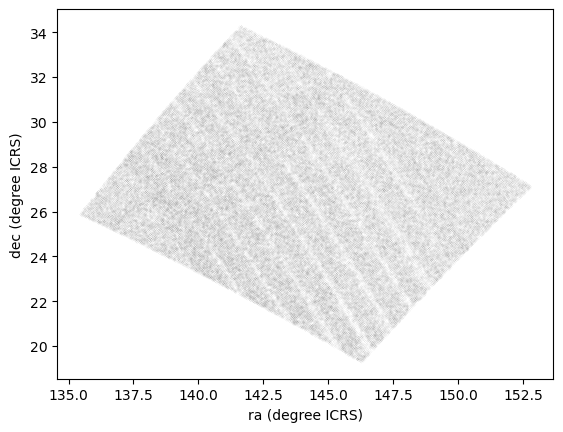

In [15]:
x = polygon_results['ra']
y = polygon_results['dec']

plt.plot(x, y, 'ko',markersize=0.1,alpha=0.1)

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

display()

## Transform Back

In [24]:
gd1_frame = GD1Koposov10

distance = 8 * u.kpc
radial_velocity= 0 * u.km/u.s

skycoord = SkyCoord(ra=polygon_results['ra'], 
                    dec=polygon_results['dec'],
                    pm_ra_cosdec=polygon_results['pmra'],
                    pm_dec=polygon_results['pmdec'], 
                    distance=distance, 
                    radial_velocity=radial_velocity)

In [25]:
transformed = skycoord.transform_to(gd1_frame)

TypeError: concatenate() got an unexpected keyword argument 'dtype'